# Импорт библиотек

In [1]:
import numpy as np
from gzip import open # NB: overrides standard open()
import pickle as pkl
import pandas as pd
import warnings 
from glob import glob
import os
import math
import functools

### Отключим предупреждения Anaconda

In [2]:
warnings.simplefilter('ignore')

# Загрузим данные

In [3]:
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/PLS_continue_2020/y.pkl.gz', 'rb'))

# N-PLS1

## Выберем столбец у с которым будем работать

In [4]:
m=0

## Посчитаем Z

In [5]:
z=np.zeros([206,55])

In [6]:
for i in range(0,55):
    for j in range(0,206):
        zsum=0
        for k in range(0,35):
            zsum+=Xdata_numpy['X'][k,j,i]*Ydata.iloc[k,m]
        z[j,i]=zsum

In [7]:
z

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , 30.42741355, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 29.76362119, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 29.36079377, ...,  0.        ,
         0.        ,  0.        ]])

## Разложим Z на вектора W$^{J}_{f}$ и W$^{I}_{f}$

In [8]:
Wk, S, WI = np.linalg.svd(z)

In [9]:
WI.shape

(55, 55)

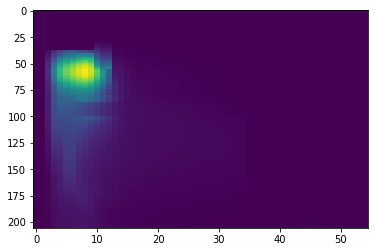

In [139]:
import matplotlib.pyplot as plt
plt.imshow(Xdata_numpy['X'][1,:,:], aspect="auto")
plt.show();

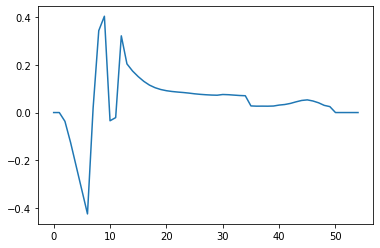

In [11]:
plt.plot(WI[3,:])
plt.show();

# Перейду к подбору нужной комбинации векторов для кронекеровского произведения для весов

In [ ]:
for i in range(0,206):
    for j in range(0,55):
        w_k=Wk[i,:]
        w_i=WI[j,:]
        t=[]
        for h in range(0,35):
            t+=[w_k.transpose*Xdata_numpy['X'][h,:,:]*w_i]
        t=np.array([t])
        T+=[t]
        T=np.array([T])

# Приближение к правильному алгоритму

In [104]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, y_train, y_test = train_test_split(
    Xdata_numpy["X"], Ydata.iloc[:,m], test_size=0.2857 
    )

In [220]:
X_train.shape[0]

25

In [238]:
x=X_train

In [239]:
y=y_train

In [240]:
y=np.array(y)

In [241]:
x=np.array(x)

In [232]:
def error(a,b):
    s=0
    for i in range(0,len(a)):
        s+=((a[i]-b.iloc[i]))**2
    return s

In [156]:
def function_1(x,y,fn):
    Tt=[]
    for f in range(0,fn):
        z=np.zeros([x.shape[1],x.shape[2]])
        for i in range(0,x.shape[2]):
            for j in range(0,x.shape[1]):
                zsum=0
                for k in range(0,x.shape[0]):
                    zsum= zsum+ x[k,j,i]*y[k]
                z[j,i]=zsum
        Wk, S, WI = np.linalg.svd(z)
        w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
        w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
    
        t=[]
        for h in range(0,x.shape[0]):
            t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
        t=np.array(t).reshape(x.shape[0],1)
        Tt+=[t]
        T=np.array(Tt).reshape(x.shape[0],f+1)
        bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
    
        for g in range(0,x.shape[0]):
            x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
        print(y[1])
        y=y-(np.dot(T,bf)) 
    return y

In [242]:
Tt=[]
mass=[]
for f in range(0,55):
    z=np.zeros([x.shape[1],x.shape[2]])
    for i in range(0,x.shape[2]):
        for j in range(0,x.shape[1]):
            zsum=0
            for k in range(0,x.shape[0]):
                zsum= zsum+ x[k,j,i]*y[k]
            z[j,i]=zsum
    Wk, S, WI = np.linalg.svd(z)
    w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
    w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
    
    t=[]
    for h in range(0,x.shape[0]):
        t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
    t=np.array(t).reshape(x.shape[0],1)
    Tt+=[t]
    T=np.array(Tt).reshape(x.shape[0],f+1)
    bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
    for g in range(0,x.shape[0]):
        x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
    y=y-(np.dot(T,bf))
    print(error(np.dot(T,bf),y_train))

6295.280934294746
39723.870950459714
36049.073090230835
45416.627291718076
39567.12324265874
41860.378385492586
42308.71945719902
43342.56710979146
43057.75984438138
43078.51331694186
42496.991485530976
42325.430591394754
42743.85341226179
43155.38218544994
43094.741365676564
42664.30325839121
42546.38734295259
42445.62765427299
42633.428867896226
42813.52928872103
42451.29100398314
42468.840912474014
42499.09000704302
42502.46773000749
42501.67300182228
42501.79181048281
42501.789737186264
42501.789743465066
42501.78974326344
42501.789738832114
42501.78974158186
42501.78974061917
42501.78975021146
42501.78963992712
42501.79005812738
42501.789486011345
42501.78957778945
42501.79058228194
42501.788344102155
42501.79284025919
42501.78463388567
42501.96706924523
42501.60224659191
42501.610713124595
42501.05603755063
42506.9718400033
42494.61300157969
42449.10086995073
42740.53210726211
42311.1884015234
42679.903071387285
41485.462363046776
41813.14603882499
35068.60304307602
113332.562427

# Попробую оформить всё в виде полноценного класса

In [ ]:
class N_PLS1():
    def error(a,b):
        s=0
        for i in range(0,len(a)):
            s+=((a[i]-b.iloc[i]))**2
        return s

    def fit(x,y,fn):
        Tt=[]
        mass=[]
        for f in range(0,fn):
            z=np.zeros([x.shape[1],x.shape[2]])
            for i in range(0,x.shape[2]):
                for j in range(0,x.shape[1]):
                    zsum=0
                    for k in range(0,x.shape[0]):
                        zsum= zsum+ x[k,j,i]*y[k]
                    z[j,i]=zsum
            Wk, S, WI = np.linalg.svd(z)
            w_k=np.array(Wk[0,:]).reshape(x.shape[1],1)
            w_i=np.array(WI[0,:]).reshape(x.shape[2],1)
            t=[]
            for h in range(0,x.shape[0]):
                t+=[np.dot(np.dot(w_k.transpose(),x[h,:,:]),w_i)]
            t=np.array(t).reshape(x.shape[0],1)
            Tt+=[t]
            T=np.array(Tt).reshape(x.shape[0],f+1)
            bf=np.dot(np.dot(np.linalg.inv(np.dot(T.transpose(),T)),T.transpose()),y)
            for g in range(0,x.shape[0]):
                x[g,:,:]=x[g,:,:]-(t[g]*w_i.transpose()*w_k)
            y=y-(np.dot(T,bf))
            
        return y

In [179]:
y

array([34.19308759, 35.72443085, 46.32211944, 35.69579348, 47.44184036,
       33.34204937, 42.44462856, 39.9018207 , 44.39973652, 54.64066407,
       53.71596802, 44.04933373, 36.11255278, 34.24246421, 36.22622795,
       26.1974747 , 41.0398005 , 31.41066637, 34.07047331, 42.14770231,
       45.44679116, 21.41118209, 44.54683093, 35.35460545, 36.47993911])

In [54]:
print(y.shape)

()


In [157]:
function_1(x,y,5)

-5.4763977852194214e-14
-1.420663662855037e-12
-1.4580267029464817e-12
-1.2938120676022591e-12
-1.1881446182327078e-12


array([ 1.68894612e-12,  2.00329419e-13,  1.32327231e-12,  3.07245841e-14,
        2.71218908e-12, -4.54736445e-13,  1.42743948e-12,  3.67873053e-12,
       -2.17012646e-12,  2.51672045e-12, -2.75503170e-12, -6.19494150e-12,
       -4.84098214e-12, -8.87287420e-13,  6.49672160e-12,  2.28468952e-12,
        1.99518072e-12,  3.14275609e-12, -1.87897603e-12,  8.34491128e-13,
       -2.95291505e-12,  1.31643761e-12,  3.38456727e-12,  3.07099108e-12,
       -8.91553773e-12])